In [0]:
# This file performs data analysis on the USTC datast 
# and prints out graphs 

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Move to drive
%cd drive
%cd 'My Drive'
%cd Oxford-Thesis

/content/drive
/content/drive/My Drive
/content/drive/My Drive/Oxford-Thesis


In [0]:
import numpy as np
import pandas as pd
from sklearn.decomposition import KernelPCA

import matplotlib.pyplot as plt
import warnings
import pickle

In [0]:
## Load in data 
with open('./embedding/CNN_FULL/USTC_rn_mal_meta_train', 'rb') as fp:
  malign_flows1 = pickle.load(fp)
  fp.close()

with open('./embedding/CNN_FULL/USTC_rn_mal_meta_valid', 'rb') as fp:
  malign_flows2 = pickle.load(fp)
  fp.close()

malign_flows = np.concatenate([malign_flows1,malign_flows2],axis =0)
  
with open('./embedding/CNN_FULL/USTC_rn_benign_meta_train', 'rb') as fp:
  benign_flows = pickle.load(fp)
  fp.close()
  

with open('./embedding/CNN_FULL/USTC_rn_benign_meta_train', 'rb') as fp:
  benign_flows1 = pickle.load(fp)
  fp.close()

with open('./embedding/CNN_FULL/USTC_rn_benign_meta_valid', 'rb') as fp:
  benign_flows2 = pickle.load(fp)
  fp.close()

benign_flows = np.concatenate([benign_flows1,benign_flows2],axis =0)
continuous_flows = np.concatenate([malign_flows,benign_flows],axis =0)

In [0]:
CONT_FEATURE_SIZE = 158
continuous_flows =[]
for malware_flows in malign_flows:
  for key in malware_flows:
    continuous_flows.append(malware_flows[key][1])
for benign_file in benign_flows:
  for key in benign_file:
    continuous_flows.append(benign_file[key][1])
continuous_flows = np.array(continuous_flows)
print(len(continuous_flows))

539743


In [0]:
NUM_VIRUT = 32029
NUM_NERIS = 32541
NUM_GEODO = 40818
NUM_NSIS = 5835
NUM_MIUREF = 13534
NUM_TINBA = 8968
NUM_ZEUS = 10779
NUM_HTBOT = 6428
NUM_SHIFU = 10324
NUM_CRIDEX = 16174

NUM_BENIGN = 355956

In [0]:
## Name of each Malicious Flow 
malicious_flow_names = []

malicious_flow_names.append('Nis-ay')
malicious_flow_names.append('Geodo')
malicious_flow_names.append('Virut')
malicious_flow_names.append('Shifu')
malicious_flow_names.append('Cridex')
malicious_flow_names.append('Tinba')
malicious_flow_names.append('Miuref')
malicious_flow_names.append('Zeus')
malicious_flow_names.append('HtBot')
malicious_flow_names.append('Neris')

## Get frequency of each network activity type
malicious_flow_frequencies = []
for malicious_flows in malign_flows:
  malicious_flow_frequencies.append(len(malicious_flows))

print(malicious_flow_names)
print(malicious_flow_frequencies)

malicious_flow_frequencies, malicious_flow_names = zip(*sorted(zip(malicious_flow_frequencies, malicious_flow_names),reverse=True))
malicious_flow_frequencies = list(malicious_flow_frequencies)
malicious_flow_names = list(malicious_flow_names)
flow_frequencies= [NUM_BENIGN]+ malicious_flow_frequencies

['Nis-ay', 'Geodo', 'Virut', 'Shifu', 'Cridex', 'Tinba', 'Miuref', 'Zeus', 'HtBot', 'Neris']
[6431, 41686, 33559, 10345, 16385, 8997, 13804, 10993, 7265, 34322]


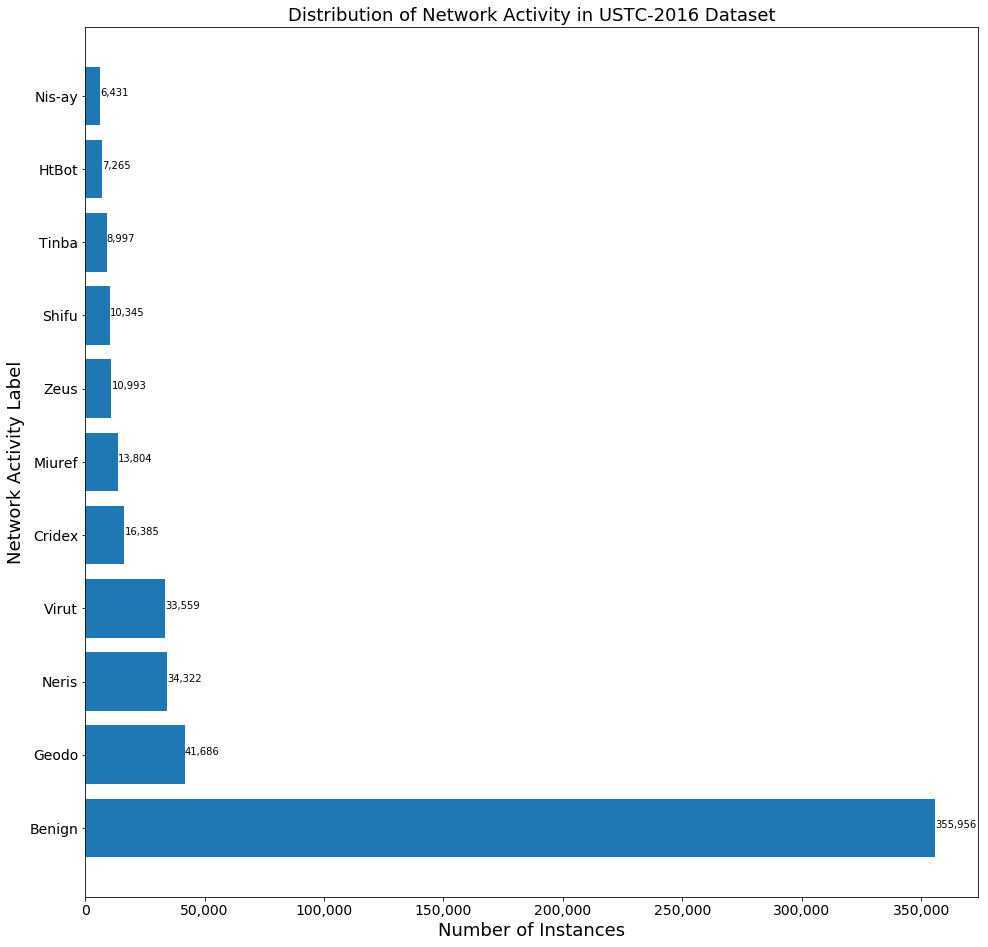

In [0]:
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)

flow_frequencies= [NUM_BENIGN]+ malicious_flow_frequencies
flow_names = ["Benign"]+malicious_flow_names
_ = ax.barh(flow_names ,flow_frequencies)


for index, value in enumerate(flow_frequencies):
  _ = ax.text(value + 100, index, format(value, ","), color='black')
_ = plt.title("Distribution of Network Activity in USTC-2016 Dataset", fontsize=18)

_ = plt.xlabel("Number of Instances", fontsize=18)
_ = plt.ylabel("Network Activity Label", fontsize=18)

plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 

# adjust x-tick limits
_ = plt.xticks(list(range(0, 400000, 50000)))
_
# format x-tick labels with commas for readability
_ = ax.set_xticklabels(["{:,}".format(x) for x in ax.get_xticks()])

fig.savefig("./Figures/USTC-dist.pdf", bbox_inches='tight')

In [0]:
# Normalize values ## 
for i in range(0,CONT_FEATURE_SIZE):
  max_value = np.max(continuous_flows[:,i])
  min_value = np.min(continuous_flows[:,i])
  continuous_flows[:,i] = ((continuous_flows[:,i] - min_value)/(max_value-min_value +1e-12))
  
## Get different flows
nsis_flows = continuous_flows[:NUM_NSIS]
geodo_flows= continuous_flows[NUM_NSIS:NUM_NSIS+NUM_GEODO]
virut_flows = continuous_flows[NUM_NSIS+NUM_GEODO:NUM_NSIS+NUM_GEODO+NUM_VIRUT]
shifu_flows = continuous_flows[NUM_NSIS+NUM_GEODO+NUM_VIRUT:NUM_NSIS+NUM_GEODO+NUM_VIRUT+NUM_SHIFU]
intermediate_total =NUM_NSIS+NUM_GEODO+NUM_VIRUT+NUM_SHIFU
cridex_flows = continuous_flows[intermediate_total:intermediate_total+NUM_CRIDEX]
tinba_flows = continuous_flows[intermediate_total+NUM_CRIDEX:intermediate_total+NUM_CRIDEX+NUM_TINBA]
miuref_flows = continuous_flows[intermediate_total+NUM_CRIDEX+NUM_TINBA:intermediate_total+NUM_CRIDEX+NUM_TINBA+NUM_MIUREF]
intermediate_total =intermediate_total +NUM_CRIDEX+NUM_TINBA+NUM_MIUREF
zeus_flows = continuous_flows[intermediate_total:intermediate_total+NUM_ZEUS]
htbot_flows = continuous_flows[intermediate_total+NUM_ZEUS:intermediate_total+NUM_ZEUS+NUM_HTBOT]
neris_flows = continuous_flows[intermediate_total+NUM_ZEUS+NUM_HTBOT:intermediate_total+NUM_ZEUS+NUM_HTBOT+NUM_NERIS]
intermediate_total = intermediate_total+NUM_ZEUS+NUM_HTBOT+NUM_NERIS+NUM_NERIS
benign_flows = continuous_flows[intermediate_total:]


In [0]:
from sklearn.utils import resample
## Cluster resample for the different types 
## of the flows
def cluster_resample(flows, num_clusters):
  NUM_SAMPLES = 5000
  sorted_flows = []
  for i in range(num_clusters):
    sorted_flows.append([])
  ## sort in num clusters ##
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(flows)
  labels = kmeans.predict(flows)
  centroids = kmeans.cluster_centers_
  for index in range(len(labels)):
    label_index = labels[index]
    sorted_flows[label_index].append(flows[index])

  resampled_flows = []
  for i in range(num_clusters):
    resampled_flows.append([])

  for i in range(num_clusters):
    resampled_flows[i] = resample(sorted_flows[i],
                                      replace=True, # sample with replacement
                                      n_samples=NUM_SAMPLES, # match number in majority class
                                      random_state=27) # reproducible results
  final_flows = []
  for i in range(num_clusters):
    for flow in resampled_flows[i]:
      final_flows.append(flow)  
  return final_flows

1
2
3
4
5
6
7
8
9
10


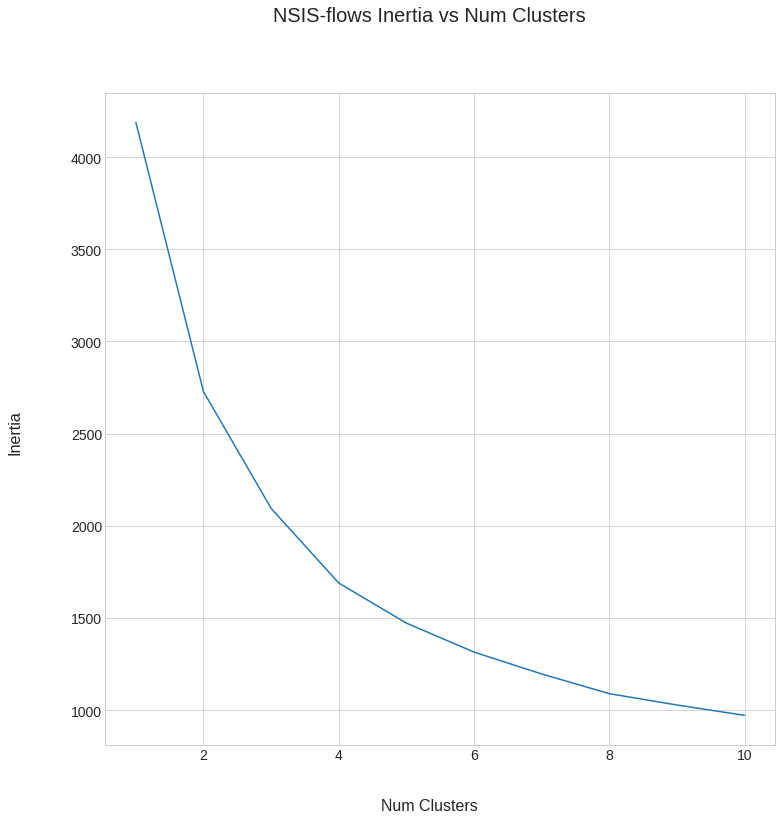

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from math import sqrt

## Get  Clustering 
kmeans = KMeans(n_clusters=2)
kmeans.fit(nsis_flows)
labels = kmeans.predict(nsis_flows)
centroids = kmeans.cluster_centers_
num_clusters = []
rmses = []
for i in range(1,11):
  print(i)
  num_clusters.append(i)
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(nsis_flows)
  labels = kmeans.predict(nsis_flows)
  centroids = kmeans.cluster_centers_
  rmses.append(kmeans.inertia_)   
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
plt.style.use('seaborn-whitegrid')
ax = fig.add_subplot(111)
_ = ax.plot(num_clusters, rmses, label="Benign")
_ = fig.suptitle('NSIS-flows Inertia vs Num Clusters', fontsize=20)
_ = fig.text(0.5, 0.05, 'Num Clusters', ha='center', fontsize=16)
_ = fig.text(0.02, 0.5, 'Inertia', ha='center', fontsize=16, rotation=90)
fig.savefig("./Figures/USTC-NSIS-Inertia"+".pdf", bbox_inches='tight')



1
2
3
4
5
6
7
8
9
10


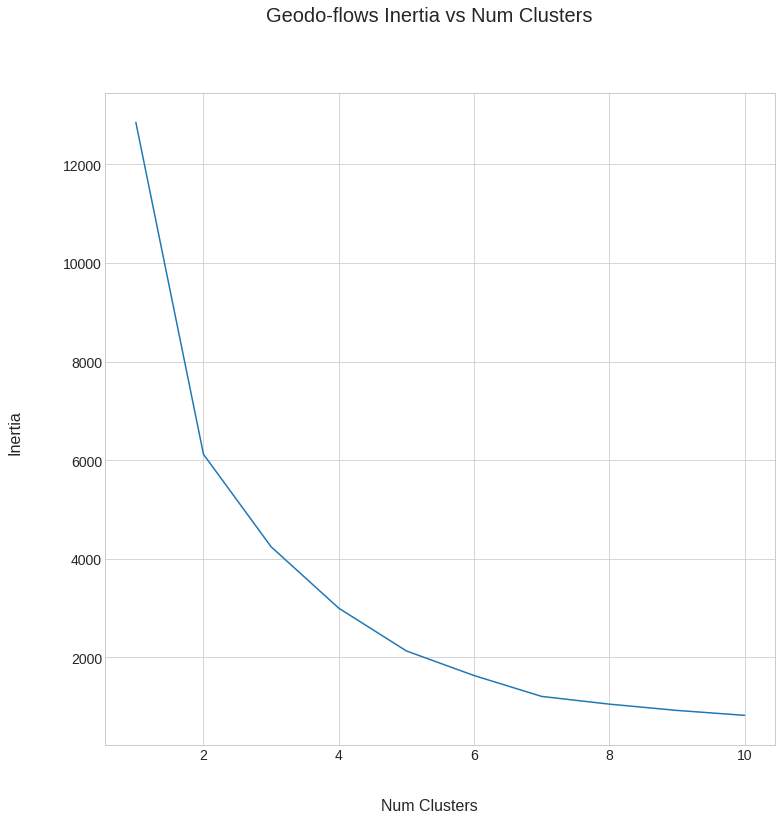

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from math import sqrt

## Get  Clustering 
num_clusters = []
rmses = []
for i in range(1,11):
  print(i)
  num_clusters.append(i)
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(geodo_flows)
  labels = kmeans.predict(geodo_flows)
  centroids = kmeans.cluster_centers_
  rmses.append(kmeans.inertia_)   
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
plt.style.use('seaborn-whitegrid')
ax = fig.add_subplot(111)
_ = ax.plot(num_clusters, rmses, label="Benign")
_ = fig.suptitle('Geodo-flows Inertia vs Num Clusters', fontsize=20)
_ = fig.text(0.5, 0.05, 'Num Clusters', ha='center', fontsize=16)
_ = fig.text(0.02, 0.5, 'Inertia', ha='center', fontsize=16, rotation=90)
fig.savefig("./Figures/USTC-Geodo-Inertia.pdf", bbox_inches='tight')


1
2
3
4
5
6
7
8
9
10


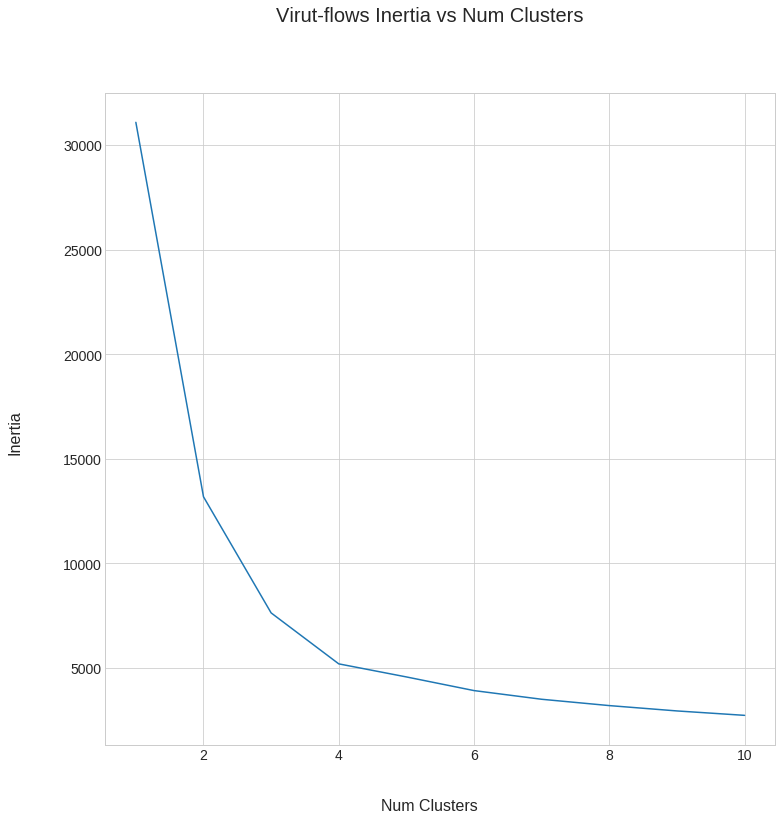

In [0]:
## Get  Clustering 
num_clusters = []
rmses = []
for i in range(1,11):
  print(i)
  num_clusters.append(i)
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(virut_flows)
  labels = kmeans.predict(virut_flows)
  centroids = kmeans.cluster_centers_
  rmses.append(kmeans.inertia_)  
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
plt.style.use('seaborn-whitegrid')
ax = fig.add_subplot(111)
_ = ax.plot(num_clusters, rmses, label="Benign")
_ = fig.suptitle('Virut-flows Inertia vs Num Clusters', fontsize=20)
_ = fig.text(0.5, 0.05, 'Num Clusters', ha='center', fontsize=16)
_ = fig.text(0.02, 0.5, 'Inertia', ha='center', fontsize=16, rotation=90)
fig.savefig("./Figures/USTC-Virut-Inertia.pdf", bbox_inches='tight')


1
2
3
4
5
6
7
8
9
10


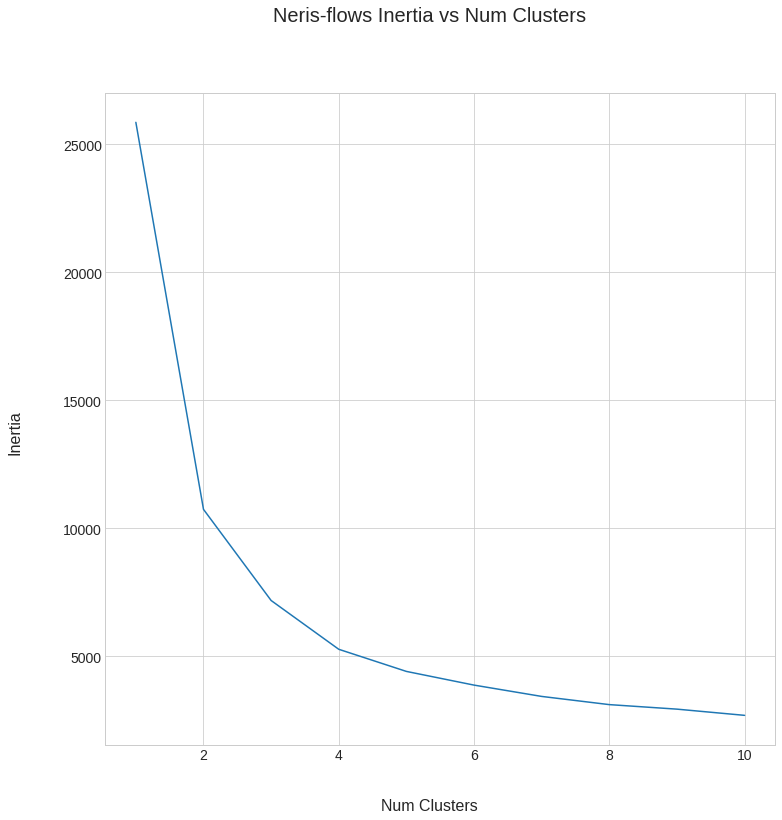

In [0]:
## Get  Clustering 
num_clusters = []
rmses = []
for i in range(1,11):
  print(i)
  num_clusters.append(i)
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(neris_flows)
  labels = kmeans.predict(neris_flows)
  centroids = kmeans.cluster_centers_
  rmses.append(kmeans.inertia_)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
plt.style.use('seaborn-whitegrid')
ax = fig.add_subplot(111)
_ = ax.plot(num_clusters, rmses, label="Benign")
_ = fig.suptitle('Neris-flows Inertia vs Num Clusters', fontsize=20)
_ = fig.text(0.5, 0.05, 'Num Clusters', ha='center', fontsize=16)
_ = fig.text(0.02, 0.5, 'Inertia', ha='center', fontsize=16, rotation=90)
fig.savefig("./Figures/USTC-Neris-Inertia.pdf", bbox_inches='tight')


1
2
3
4
5
6
7
8
9
10


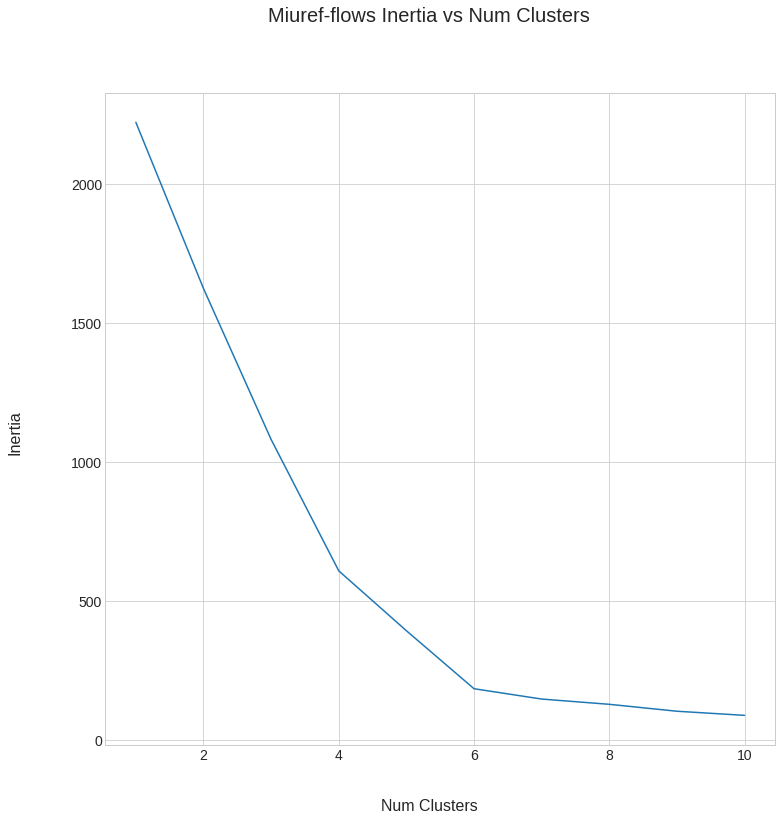

In [0]:
## Get  Clustering 
num_clusters = []
rmses = []
for i in range(1,11):
  print(i)
  num_clusters.append(i)
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(miuref_flows)
  labels = kmeans.predict(miuref_flows)
  centroids = kmeans.cluster_centers_
  rmses.append(kmeans.inertia_)
  
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
plt.style.use('seaborn-whitegrid')
ax = fig.add_subplot(111)
_ = ax.plot(num_clusters, rmses, label="Benign")
_ = fig.suptitle('Miuref-flows Inertia vs Num Clusters', fontsize=20)
_ = fig.text(0.5, 0.05, 'Num Clusters', ha='center', fontsize=16)
_ = fig.text(0.02, 0.5, 'Inertia', ha='center', fontsize=16, rotation=90)
fig.savefig("./Figures/USTC-Miuref-Inertia.pdf", bbox_inches='tight')


1
2
3
4
5
6
7
8
9
10


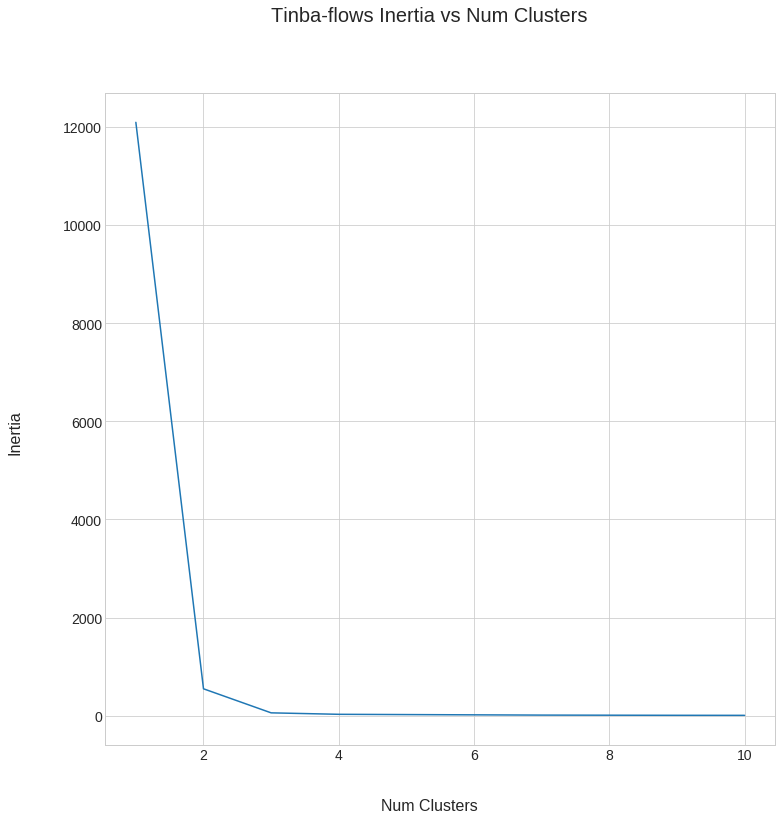

In [0]:
## Get  Clustering 
num_clusters = []
rmses = []
for i in range(1,11):
  print(i)
  num_clusters.append(i)
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(tinba_flows)
  labels = kmeans.predict(tinba_flows)
  centroids = kmeans.cluster_centers_
  rmses.append(kmeans.inertia_)   
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
plt.style.use('seaborn-whitegrid')
ax = fig.add_subplot(111)
_ = ax.plot(num_clusters, rmses, label="Benign")
_ = fig.suptitle('Tinba-flows Inertia vs Num Clusters', fontsize=20)
_ = fig.text(0.5, 0.05, 'Num Clusters', ha='center', fontsize=16)
_ = fig.text(0.02, 0.5, 'Inertia', ha='center', fontsize=16, rotation=90)
fig.savefig("./Figures/USTC-Tinba-Inertia.pdf", bbox_inches='tight')


1
2
3
4
5
6
7
8
9
10


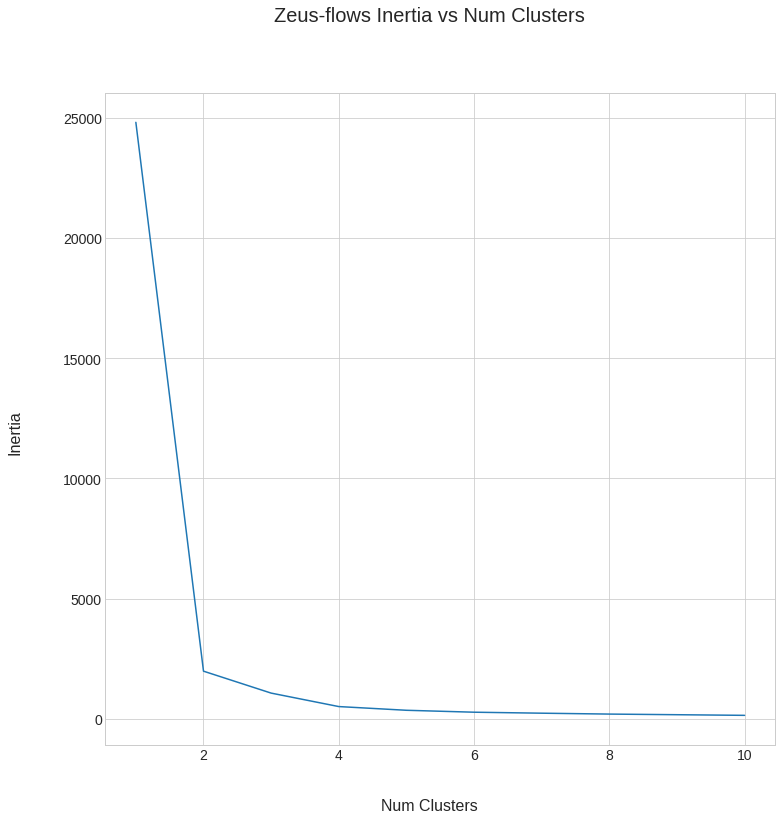

In [0]:
## Get  Clustering 
num_clusters = []
rmses = []
for i in range(1,11):
  print(i)
  num_clusters.append(i)
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(zeus_flows)
  labels = kmeans.predict(zeus_flows)
  centroids = kmeans.cluster_centers_
  rmses.append(kmeans.inertia_)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
plt.style.use('seaborn-whitegrid')
ax = fig.add_subplot(111)
_ = ax.plot(num_clusters, rmses, label="Benign")
_ = fig.suptitle('Zeus-flows Inertia vs Num Clusters', fontsize=20)
_ = fig.text(0.5, 0.05, 'Num Clusters', ha='center', fontsize=16)
_ = fig.text(0.02, 0.5, 'Inertia', ha='center', fontsize=16, rotation=90)
fig.savefig("./Figures/USTC-Zeus-Inertia.pdf", bbox_inches='tight')


1
2
3
4
5
6
7
8
9
10


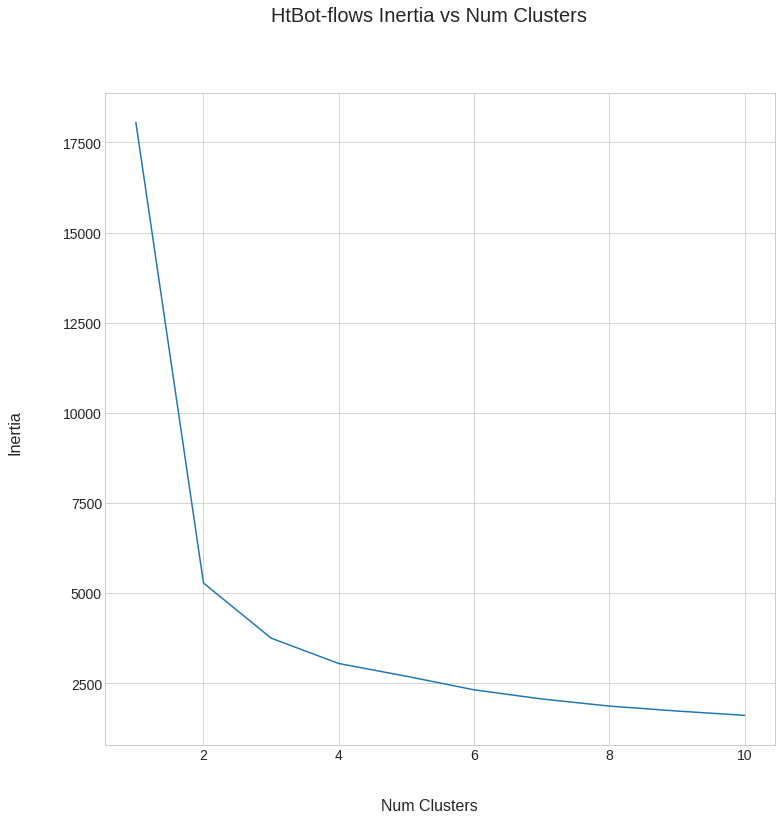

In [0]:
## Get  Clustering 
num_clusters = []
rmses = []
for i in range(1,11):
  print(i)
  num_clusters.append(i)
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(htbot_flows)
  labels = kmeans.predict(htbot_flows)
  centroids = kmeans.cluster_centers_
  rmses.append(kmeans.inertia_)  
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
plt.style.use('seaborn-whitegrid')
ax = fig.add_subplot(111)
_ = ax.plot(num_clusters, rmses, label="Benign")
_ = fig.suptitle('HtBot-flows Inertia vs Num Clusters', fontsize=20)
_ = fig.text(0.5, 0.05, 'Num Clusters', ha='center', fontsize=16)
_ = fig.text(0.02, 0.5, 'Inertia', ha='center', fontsize=16, rotation=90)
fig.savefig("./Figures/USTC-Htbot-Inertia.pdf", bbox_inches='tight')


1
2
3
4
5
6
7
8
9
10


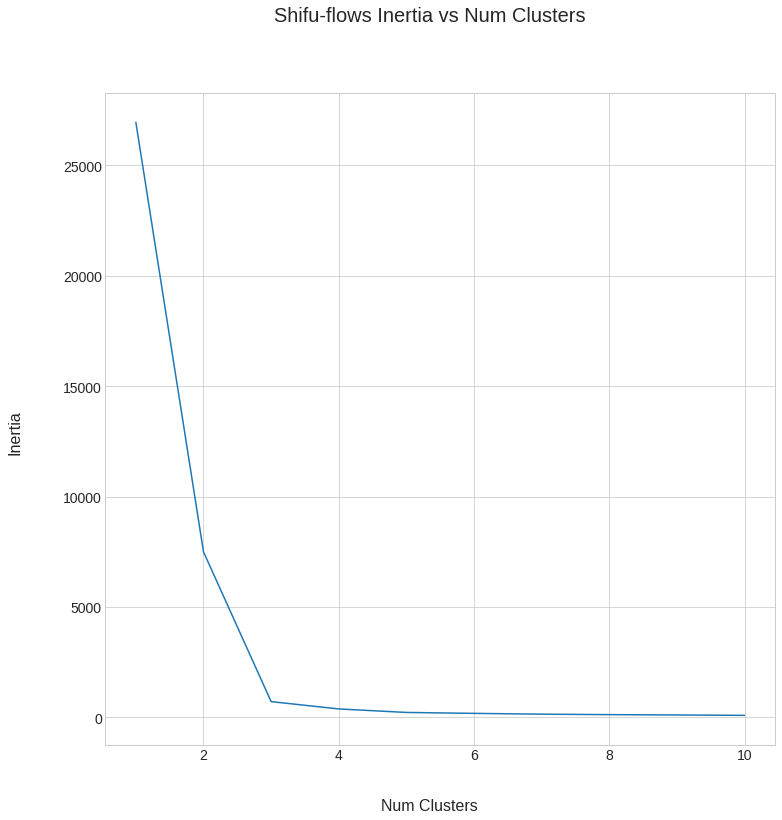

In [0]:
## Get  Clustering 
num_clusters = []
rmses = []
for i in range(1,11):
  print(i)
  num_clusters.append(i)
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(shifu_flows)
  labels = kmeans.predict(shifu_flows)
  centroids = kmeans.cluster_centers_
  rmses.append(kmeans.inertia_)  
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
plt.style.use('seaborn-whitegrid')
ax = fig.add_subplot(111)
_ = ax.plot(num_clusters, rmses, label="Benign")
_ = fig.suptitle('Shifu-flows Inertia vs Num Clusters', fontsize=20)
_ = fig.text(0.5, 0.05, 'Num Clusters', ha='center', fontsize=16)
_ = fig.text(0.02, 0.5, 'Inertia', ha='center', fontsize=16, rotation=90)
fig.savefig("./Figures/USTC-Shifu-Inertia.pdf", bbox_inches='tight')


1
2
3
4
5
6
7
8
9
10


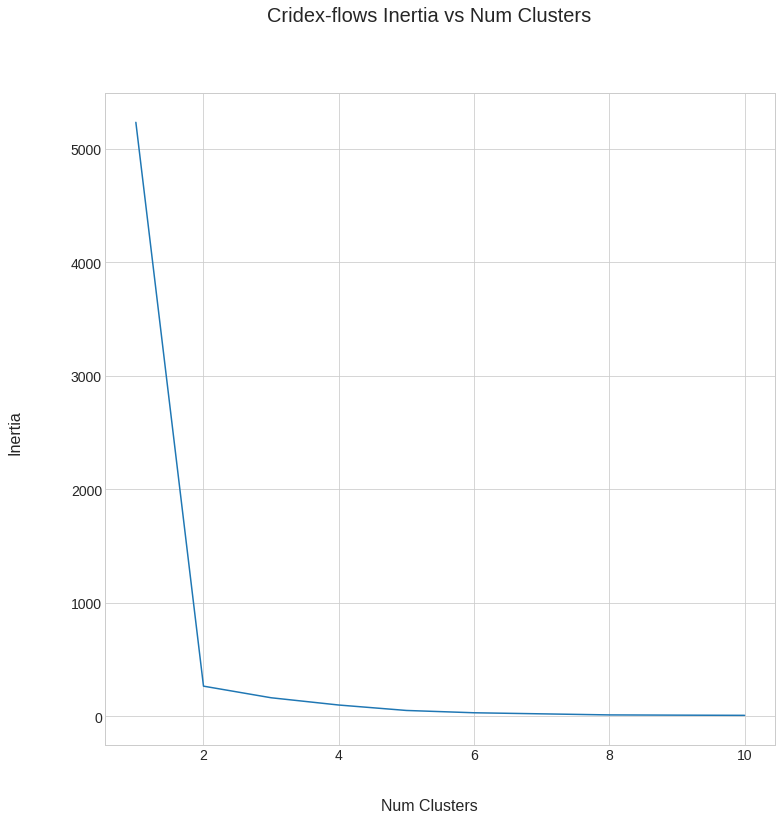

In [0]:
## Get  Clustering 
num_clusters = []
rmses = []
for i in range(1,11):
  print(i)
  num_clusters.append(i)
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(cridex_flows)
  labels = kmeans.predict(cridex_flows)
  centroids = kmeans.cluster_centers_
  rmses.append(kmeans.inertia_)    
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
plt.style.use('seaborn-whitegrid')
ax = fig.add_subplot(111)
_ = ax.plot(num_clusters, rmses, label="Benign")
_ = fig.suptitle('Cridex-flows Inertia vs Num Clusters', fontsize=20)
_ = fig.text(0.5, 0.05, 'Num Clusters', ha='center', fontsize=16)
_ = fig.text(0.02, 0.5, 'Inertia', ha='center', fontsize=16, rotation=90)
fig.savefig("./Figures/USTC-Cridex-Inertia.pdf", bbox_inches='tight')


In [0]:
## Get Sampling for TSNE  Analysis

NUM_SAMPLED = 1000
BENIGN_SAMPLED = 4000
virut_index = np.random.choice(len(virut_flows), NUM_SAMPLED , replace=False)
nsis_index = np.random.choice(len(nsis_flows), NUM_SAMPLED , replace=False)
neris_index = np.random.choice(len(neris_flows), NUM_SAMPLED , replace=False)
geodo_index = np.random.choice(len(geodo_flows), NUM_SAMPLED , replace=False)
shifu_index = np.random.choice(len(shifu_flows), NUM_SAMPLED , replace=False)
cridex_index = np.random.choice(len(cridex_flows), NUM_SAMPLED , replace=False)
tinba_index = np.random.choice(len(tinba_flows), NUM_SAMPLED , replace=False)
miuref_index = np.random.choice(len(miuref_flows), NUM_SAMPLED , replace=False)
zeus_index = np.random.choice(len(zeus_flows), NUM_SAMPLED , replace=False)
htbot_index = np.random.choice(len(htbot_flows), NUM_SAMPLED , replace=False)
benign_index = np.random.choice(len(benign_flows), BENIGN_SAMPLED , replace=False)


SAMPLED_NUM_VIRUT = NUM_SAMPLED
SAMPLED_NUM_NERIS = NUM_SAMPLED
SAMPLED_NUM_NSIS = NUM_SAMPLED
SAMPLED_NUM_HTBOT = NUM_SAMPLED
SAMPLED_NUM_GEODO = NUM_SAMPLED
SAMPLED_NUM_SHIFU = NUM_SAMPLED
SAMPLED_NUM_CRIDEX = NUM_SAMPLED
SAMPLED_NUM_TINBA = NUM_SAMPLED
SAMPLED_NUM_MIUREF= NUM_SAMPLED
SAMPLED_NUM_ZEUS = NUM_SAMPLED

In [0]:
## Get Sampling for TSNE  Analysis
sampled_virut_flows =[]
sampled_neris_flows = []
sampled_nsis_flows = []
sampled_htbot_flows = []
sampled_geodo_flows =[]
sampled_shifu_flows = []
sampled_cridex_flows = []
sampled_tinba_flows = []
sampled_miuref_flows = []
sampled_zeus_flows = []
sampled_benign_flows = []
for i in virut_index:
  sampled_virut_flows.append(virut_flows[i]) 
for i in neris_index:
  sampled_neris_flows.append(neris_flows[i]) 
for i in nsis_index:
  sampled_nsis_flows.append(nsis_flows[i])  
for i in htbot_index:
  sampled_htbot_flows.append(htbot_flows[i])  
  
for i in geodo_index:
  sampled_geodo_flows.append(geodo_flows[i]) 
for i in shifu_index:
  sampled_shifu_flows.append(shifu_flows[i]) 
for i in cridex_index:
  sampled_cridex_flows.append(cridex_flows[i])  
for i in tinba_index:
  sampled_tinba_flows.append(tinba_flows[i])
for i in miuref_index:
  sampled_miuref_flows.append(miuref_flows[i])  
for i in zeus_index:
  sampled_zeus_flows.append(zeus_flows[i])
for i in benign_index:
  sampled_benign_flows.append(benign_flows[i])
  


In [0]:
all_flows = list(sampled_virut_flows) +list(sampled_neris_flows)+ list(sampled_geodo_flows) +list(sampled_nsis_flows)
all_flows = all_flows + list(sampled_miuref_flows) + list(sampled_tinba_flows)+ list(sampled_zeus_flows)
all_flows = all_flows + list(sampled_htbot_flows) + list(sampled_shifu_flows) + list(sampled_cridex_flows) 

In [0]:
from sklearn.manifold import TSNE
## Get TSNE  Analysis
data_transformed = TSNE(n_components=2).fit_transform(all_flows)
print(len(data_transformed))

dt_virut_flows = data_transformed[:SAMPLED_NUM_VIRUT]
dt_neris_flows = data_transformed[SAMPLED_NUM_VIRUT:SAMPLED_NUM_VIRUT+SAMPLED_NUM_NERIS]
dt_geodo_flows = data_transformed[SAMPLED_NUM_VIRUT+SAMPLED_NUM_NERIS:SAMPLED_NUM_VIRUT+SAMPLED_NUM_NERIS+SAMPLED_NUM_GEODO]
total_index = SAMPLED_NUM_VIRUT+SAMPLED_NUM_NERIS+SAMPLED_NUM_GEODO

dt_nsis_flows = data_transformed[total_index:total_index+SAMPLED_NUM_NSIS]
dt_miuref_flows = data_transformed[total_index+SAMPLED_NUM_NSIS:total_index+SAMPLED_NUM_NSIS+SAMPLED_NUM_MIUREF]
dt_tinba_flows = data_transformed[total_index+SAMPLED_NUM_NSIS+SAMPLED_NUM_MIUREF:total_index+SAMPLED_NUM_NSIS+SAMPLED_NUM_MIUREF+SAMPLED_NUM_TINBA]
total_index = total_index+SAMPLED_NUM_NSIS+SAMPLED_NUM_MIUREF+SAMPLED_NUM_TINBA
print(total_index)

dt_zeus_flows = data_transformed[total_index:total_index+SAMPLED_NUM_ZEUS]
dt_htbot_flows = data_transformed[total_index+SAMPLED_NUM_ZEUS:total_index+SAMPLED_NUM_ZEUS+SAMPLED_NUM_HTBOT]
dt_shifu_flows = data_transformed[total_index+SAMPLED_NUM_ZEUS+SAMPLED_NUM_HTBOT:total_index+SAMPLED_NUM_ZEUS+SAMPLED_NUM_HTBOT+SAMPLED_NUM_SHIFU]
dt_cridex_flows =data_transformed[total_index+SAMPLED_NUM_ZEUS+SAMPLED_NUM_HTBOT+SAMPLED_NUM_SHIFU:total_index+SAMPLED_NUM_ZEUS+SAMPLED_NUM_HTBOT+SAMPLED_NUM_SHIFU+SAMPLED_NUM_CRIDEX]
print(total_index+SAMPLED_NUM_ZEUS+SAMPLED_NUM_HTBOT+SAMPLED_NUM_SHIFU+SAMPLED_NUM_CRIDEX)

VIRUT = {0: [x[0] for x in dt_virut_flows],
             1: [x[1] for x in dt_virut_flows]}

NERIS = {0: [x[0] for x in dt_neris_flows],
             1: [x[1] for x in dt_neris_flows]}

GEODO = {0: [x[0] for x in dt_geodo_flows],
             1: [x[1] for x in dt_geodo_flows]}

NSIS = {0: [x[0] for x in dt_nsis_flows],
             1: [x[1] for x in dt_nsis_flows]}

MIUREF = {0: [x[0] for x in dt_miuref_flows],
             1: [x[1] for x in dt_miuref_flows]}

TINBA = {0: [x[0] for x in dt_tinba_flows],
             1: [x[1] for x in dt_tinba_flows]}

ZEUS = {0: [x[0] for x in dt_zeus_flows],
             1: [x[1] for x in dt_zeus_flows]}

HTBOT = {0: [x[0] for x in dt_htbot_flows],
             1: [x[1] for x in dt_htbot_flows]}

SHIFU = {0: [x[0] for x in dt_shifu_flows],
             1: [x[1] for x in dt_shifu_flows]}

CRIDEX = {0: [x[0] for x in dt_cridex_flows],
             1: [x[1] for x in dt_cridex_flows]}


10000
6000
10000


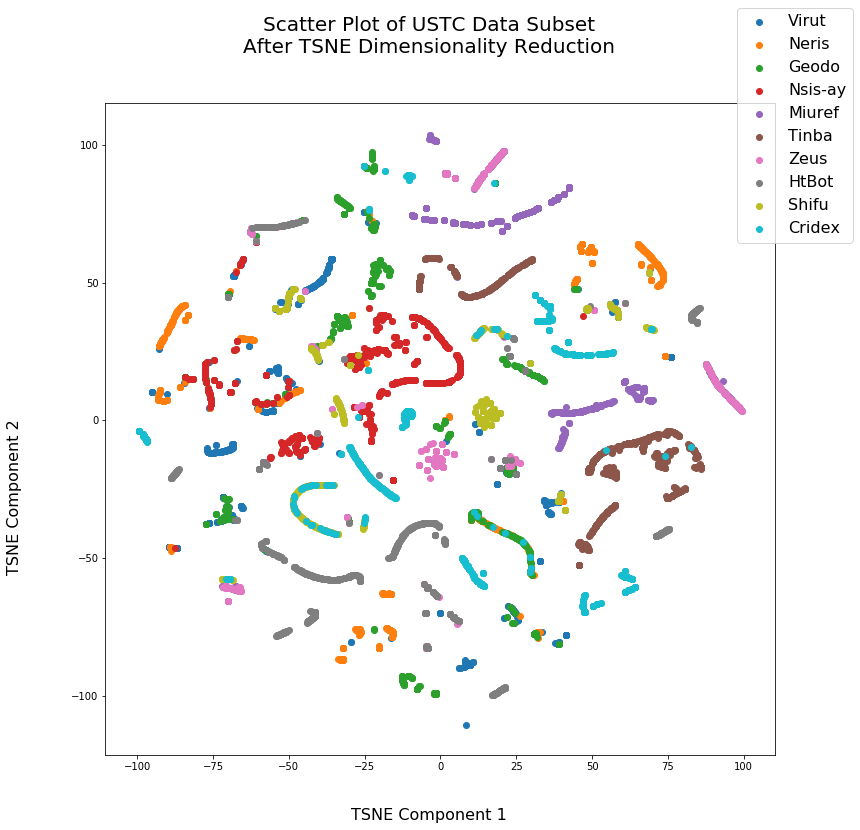

In [0]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
_ = ax.scatter(VIRUT[0], VIRUT[1], label="Virut")
_ = ax.scatter(NERIS[0], NERIS[1], label="Neris")
_ = ax.scatter(GEODO[0], GEODO[1], label="Geodo")
_ = ax.scatter(NSIS[0], NSIS[1], label="Nsis-ay")
_ = ax.scatter(MIUREF[0], MIUREF[1], label="Miuref")
_ = ax.scatter(TINBA[0], TINBA[1], label="Tinba")
_ = ax.scatter(ZEUS[0], ZEUS[1], label="Zeus")
_ = ax.scatter(HTBOT[0], HTBOT[1], label="HtBot")
_ = ax.scatter(SHIFU[0], SHIFU[1], label="Shifu")
_ = ax.scatter(CRIDEX[0], CRIDEX[1], label="Cridex")
_ = fig.suptitle('Scatter Plot of USTC Data Subset\nAfter TSNE Dimensionality Reduction', fontsize=20)
_ = fig.text(0.5, 0.05, 'TSNE Component 1', ha='center', fontsize=16)
_ = fig.text(0.02, 0.5, 'TSNE Component 2', ha='center', fontsize=16, rotation=90)
_ = fig.legend(fontsize=16)

fig.savefig("./Figures/USTC-mal-TSNE.pdf", bbox_inches='tight')

In [0]:
all_flows = list(sampled_virut_flows) +list(sampled_neris_flows)+ list(sampled_geodo_flows) +list(sampled_nsis_flows)
all_flows = all_flows + list(sampled_miuref_flows) + list(sampled_tinba_flows)+ list(sampled_zeus_flows)
all_flows = all_flows + list(sampled_htbot_flows) + list(sampled_shifu_flows) + list(sampled_cridex_flows) + list(sampled_benign_flows)

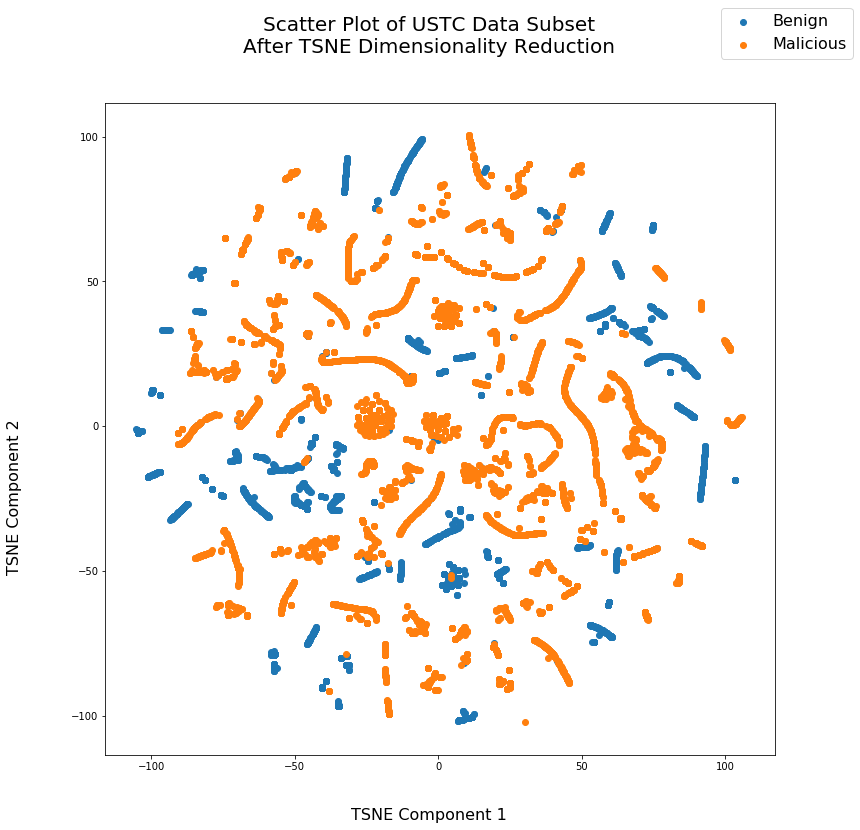

In [0]:
from sklearn.manifold import TSNE
## Get TSNE  Analysis
data_transformed = TSNE(n_components=2).fit_transform(all_flows)
benign_data_transformed = data_transformed[10000:]
malicious_data_transformed = data_transformed[:10000]
BENIGN = {0: [x[0] for x in benign_data_transformed],
          1: [x[1] for x in benign_data_transformed]}

MALICIOUS = {0: [x[0] for x in malicious_data_transformed],
             1: [x[1] for x in malicious_data_transformed]}

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
_ = ax.scatter(BENIGN[0], BENIGN[1], label="Benign")
_ = ax.scatter(MALICIOUS[0], MALICIOUS[1], label="Malicious")
_ = fig.suptitle('Scatter Plot of USTC Data Subset\nAfter TSNE Dimensionality Reduction', fontsize=20)
_ = fig.text(0.5, 0.05, 'TSNE Component 1', ha='center', fontsize=16)
_ = fig.text(0.02, 0.5, 'TSNE Component 2', ha='center', fontsize=16, rotation=90)
_ = fig.legend(fontsize=16)

fig.savefig("./Figures/USTC-all-TSNE.pdf", bbox_inches='tight')

In [0]:
from sklearn.manifold import TSNE
## Get TSNE  Analysis
### 3D INFO ##
all_flows = []
all_flows = list(sampled_virut_flows) +list(sampled_neris_flows)+ list(sampled_geodo_flows) +list(sampled_nsis_flows)
all_flows = all_flows + list(sampled_miuref_flows) + list(sampled_tinba_flows)+ list(sampled_zeus_flows)
all_flows = all_flows + list(sampled_htbot_flows) + list(sampled_shifu_flows) + list(sampled_cridex_flows) 
data_transformed = TSNE(n_components=3).fit_transform(all_flows)

dt_virut_flows = data_transformed[:SAMPLED_NUM_VIRUT]
dt_neris_flows = data_transformed[SAMPLED_NUM_VIRUT:SAMPLED_NUM_VIRUT+SAMPLED_NUM_NERIS]
dt_geodo_flows = data_transformed[SAMPLED_NUM_VIRUT+SAMPLED_NUM_NERIS:SAMPLED_NUM_VIRUT+SAMPLED_NUM_NERIS+SAMPLED_NUM_GEODO]
total_index = SAMPLED_NUM_VIRUT+SAMPLED_NUM_NERIS+SAMPLED_NUM_GEODO

dt_nsis_flows = data_transformed[total_index:total_index+SAMPLED_NUM_NSIS]
dt_miuref_flows = data_transformed[total_index+SAMPLED_NUM_NSIS:total_index+SAMPLED_NUM_NSIS+SAMPLED_NUM_MIUREF]
dt_tinba_flows = data_transformed[total_index+SAMPLED_NUM_NSIS+SAMPLED_NUM_MIUREF:total_index+SAMPLED_NUM_NSIS+SAMPLED_NUM_MIUREF+SAMPLED_NUM_TINBA]
total_index = total_index+SAMPLED_NUM_NSIS+SAMPLED_NUM_MIUREF+SAMPLED_NUM_TINBA
print(total_index)

dt_zeus_flows = data_transformed[total_index:total_index+SAMPLED_NUM_ZEUS]
dt_htbot_flows = data_transformed[total_index+SAMPLED_NUM_ZEUS:total_index+SAMPLED_NUM_ZEUS+SAMPLED_NUM_HTBOT]
dt_shifu_flows = data_transformed[total_index+SAMPLED_NUM_ZEUS+SAMPLED_NUM_HTBOT:total_index+SAMPLED_NUM_ZEUS+SAMPLED_NUM_HTBOT+SAMPLED_NUM_SHIFU]
dt_cridex_flows =data_transformed[total_index+SAMPLED_NUM_ZEUS+SAMPLED_NUM_HTBOT+SAMPLED_NUM_SHIFU:total_index+SAMPLED_NUM_ZEUS+SAMPLED_NUM_HTBOT+SAMPLED_NUM_SHIFU+SAMPLED_NUM_CRIDEX]
print(total_index+SAMPLED_NUM_ZEUS+SAMPLED_NUM_HTBOT+SAMPLED_NUM_SHIFU+SAMPLED_NUM_CRIDEX)

VIRUT = {0: [x[0] for x in dt_virut_flows],
             1: [x[1] for x in dt_virut_flows],
        2: [x[2] for x in dt_virut_flows]}

NERIS = {0: [x[0] for x in dt_neris_flows],
             1: [x[1] for x in dt_neris_flows], 
                2: [x[2] for x in dt_neris_flows]}

GEODO = {0: [x[0] for x in dt_geodo_flows],
             1: [x[1] for x in dt_geodo_flows],
                2: [x[2] for x in dt_geodo_flows]}

NSIS = {0: [x[0] for x in dt_nsis_flows],
             1: [x[1] for x in dt_nsis_flows],
                2: [x[2] for x in dt_nsis_flows]}

MIUREF = {0: [x[0] for x in dt_miuref_flows],
             1: [x[1] for x in dt_miuref_flows],
                2: [x[2] for x in dt_miuref_flows]}

TINBA = {0: [x[0] for x in dt_tinba_flows],
             1: [x[1] for x in dt_tinba_flows],
                2: [x[2] for x in dt_tinba_flows]}

ZEUS = {0: [x[0] for x in dt_zeus_flows],
             1: [x[1] for x in dt_zeus_flows],
                2: [x[2] for x in dt_zeus_flows]}

HTBOT = {0: [x[0] for x in dt_htbot_flows],
             1: [x[1] for x in dt_htbot_flows],
        2: [x[2] for x in dt_htbot_flows]}

SHIFU = {0: [x[0] for x in dt_shifu_flows],
             1: [x[1] for x in dt_shifu_flows],
        2: [x[2] for x in dt_shifu_flows]}

CRIDEX = {0: [x[0] for x in dt_cridex_flows],
             1: [x[1] for x in dt_cridex_flows],
         2: [x[2] for x in dt_cridex_flows]}


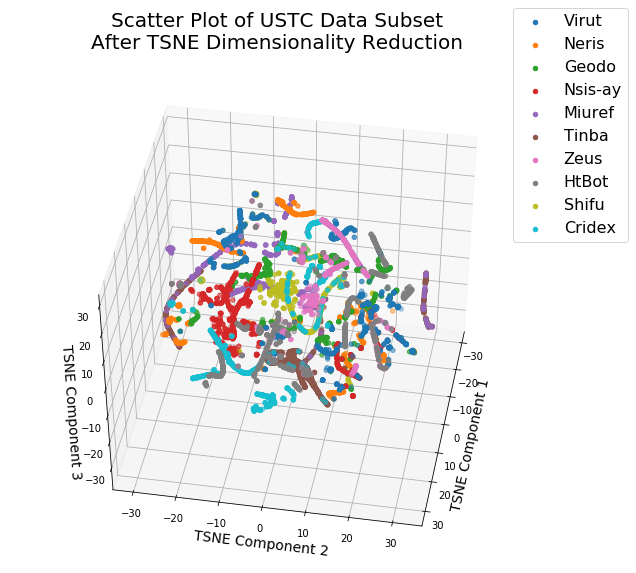

In [0]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(45, 10)
ax.figure.set_size_inches(10, 9)
_ = ax.scatter3D(VIRUT[0], VIRUT[1],VIRUT[2], label="Virut")
_ = ax.scatter3D(NERIS[0], NERIS[1],NERIS[2], label="Neris")
_ = ax.scatter3D(GEODO[0], GEODO[1],GEODO[2], label="Geodo")
_ = ax.scatter3D(NSIS[0], NSIS[1],NSIS[2], label="Nsis-ay")
_ = ax.scatter3D(MIUREF[0], MIUREF[1],MIUREF[2], label="Miuref")
_ = ax.scatter3D(TINBA[0], TINBA[1],TINBA[2], label="Tinba")
_ = ax.scatter3D(ZEUS[0], ZEUS[1], ZEUS[2], label="Zeus")
_ = ax.scatter3D(HTBOT[0], HTBOT[1], HTBOT[2], label="HtBot")
_ = ax.scatter3D(SHIFU[0], SHIFU[1], SHIFU[2], label="Shifu")
_ = ax.scatter3D(CRIDEX[0], CRIDEX[1], CRIDEX[2], label="Cridex")
_ = fig.suptitle('Scatter Plot of USTC Data Subset\nAfter TSNE Dimensionality Reduction', fontsize=20)
_ = ax.set_xlabel('TSNE Component 1')
_ = ax.set_ylabel('TSNE Component 2')
_ = ax.set_zlabel('TSNE Component 3')
ax.yaxis.label.set_size(14)
ax.xaxis.label.set_size(14)
ax.zaxis.label.set_size(14)
# _ = fig.text(0.5, 0.05, 'Principal Component 1', ha='center', fontsize=16)
# _ = fig.text(0.02, 0.5, 'Principal Component 2', ha='center', fontsize=16, rotation=90)
# _ = fig.text(0.02, 0.5, 'Principal Component 3', ha='center', fontsize=16, rotation=180)
_ = fig.legend(fontsize=16)

fig.savefig("./Figures/USTC-mal-TSNE3D.pdf", bbox_inches='tight')

In [0]:
all_flows = []
all_flows = list(sampled_virut_flows) +list(sampled_neris_flows)+ list(sampled_geodo_flows) +list(sampled_nsis_flows)
all_flows = all_flows + list(sampled_miuref_flows) + list(sampled_tinba_flows)+ list(sampled_zeus_flows)
all_flows = all_flows + list(sampled_htbot_flows) + list(sampled_shifu_flows) + list(sampled_cridex_flows) +list(sampled_benign_flows)
print(len(all_flows))

data_transformed = TSNE(n_components=3).fit_transform(all_flows)
benign_data_transformed = data_transformed[10000:]
malicious_data_transformed = data_transformed[:10000]

14000


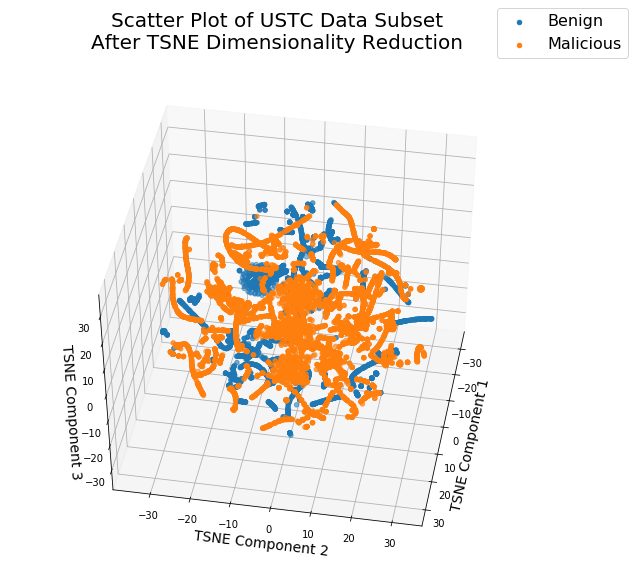

In [0]:

BENIGN = {0: [x[0] for x in benign_data_transformed],
          1: [x[1] for x in benign_data_transformed],
         2: [x[2] for x in benign_data_transformed]}

MALICIOUS = {0: [x[0] for x in malicious_data_transformed],
             1: [x[1] for x in malicious_data_transformed],
            2: [x[2] for x in malicious_data_transformed]}

from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.view_init(45, 10)
ax.figure.set_size_inches(10, 9)
_ = ax.scatter(BENIGN[0], BENIGN[1],BENIGN[2], label="Benign")
_ = ax.scatter(MALICIOUS[0], MALICIOUS[1],MALICIOUS[2], label="Malicious")
_ = fig.suptitle('Scatter Plot of USTC Data Subset\nAfter TSNE Dimensionality Reduction', fontsize=20)
_ = ax.set_xlabel('TSNE Component 1')
_ = ax.set_ylabel('TSNE Component 2')
_ = ax.set_zlabel('TSNE Component 3')
ax.yaxis.label.set_size(14)
ax.xaxis.label.set_size(14)
ax.zaxis.label.set_size(14)
_ = fig.legend(fontsize=16)

fig.savefig("./Figures/USTC-all-TSNE3D.pdf", bbox_inches='tight')